<a href="https://colab.research.google.com/github/Khiet-ht/AI/blob/main/Braille_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (30,40,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(26, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 10, 64)        0         
 2D)                                                  

In [24]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [25]:
train_directory = '/content/drive/MyDrive/Data2'

In [26]:
train_generator = train_data.flow_from_directory(
    train_directory,  # Đường dẫn đến thư mục chứa ảnh huấn luyện
    target_size=(30, 40),  # Kích thước ảnh đầu vào (chiều rộng, chiều cao)
    batch_size=32,  # Kích thước batch
    class_mode='categorical'  # Chế độ class: 'categorical' cho one-hot encoding, 'binary' cho nhãn nhị phân
)

Found 2210 images belonging to 26 classes.


In [27]:
train_generator.class_indices


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [28]:
train = model.fit(train_generator, epochs = 20, batch_size = 64, verbose = 1)

Score = model.evaluate(train_generator, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Epoch 1/20
70/70 [==============================] - 15s 203ms/step - loss: 2.8700 - accuracy: 0.1643
Epoch 2/20
70/70 [==============================] - 20s 283ms/step - loss: 0.6634 - accuracy: 0.7520
Epoch 3/20
70/70 [==============================] - 13s 190ms/step - loss: 0.2945 - accuracy: 0.8670
Epoch 4/20
70/70 [==============================] - 11s 153ms/step - loss: 0.2785 - accuracy: 0.8833
Epoch 5/20
70/70 [==============================] - 9s 132ms/step - loss: 0.2227 - accuracy: 0.8946
Epoch 6/20
70/70 [==============================] - 10s 147ms/step - loss: 0.2176 - accuracy: 0.8910
Epoch 7/20
70/70 [==============================] - 11s 155ms/step - loss: 0.2161 - accuracy: 0.9018
Epoch 8/20
70/70 [==============================] - 10s 146ms/step - loss: 0.1994 - accuracy: 0.9045
Epoch 9/20
70/70 [==============================] - 9s 127ms/step - loss: 0.1817 - accuracy: 0.9172
Epoch 10/20
70/70 [==============================] - 12s 165ms/step - loss: 0.1523 - accuracy

Text(0.5, 0, 'Epochs')

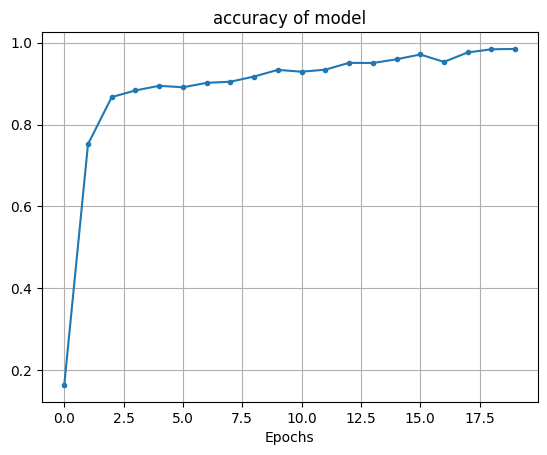

In [29]:
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'],'.-')
# plt.plot(train.history['loss'])
plt.title('accuracy of model')
# plt.ylabel('accuracy')
plt.grid(True)
plt.xlabel('Epochs')
# plt.legend(['accuracy','error'], loc = 'lower right')

Text(0.5, 0, 'Epochs')

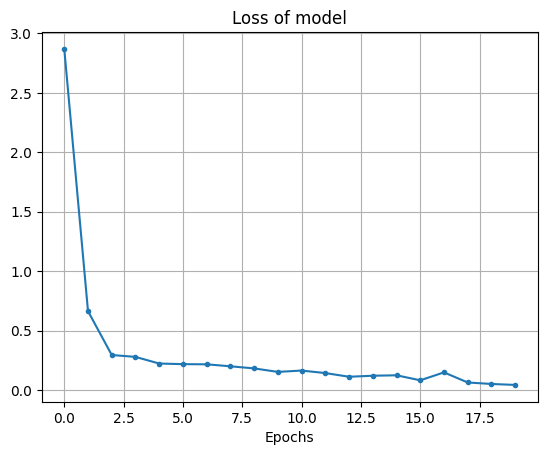

In [30]:
import matplotlib.pyplot as plt
#plt.plot(train.history['accuracy'])
plt.plot(train.history['loss'],'.-')
plt.title('Loss of model')
#plt.ylabel('accuracy')
plt.grid(True)
plt.xlabel('Epochs')
# plt.legend(['accuracy','error'], loc = 'lower right')

In [31]:

model.save('/content/drive/MyDrive/Colab Notebooks/traning_model/braille2.h5')


In [32]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/traning_model/braille2.h5')

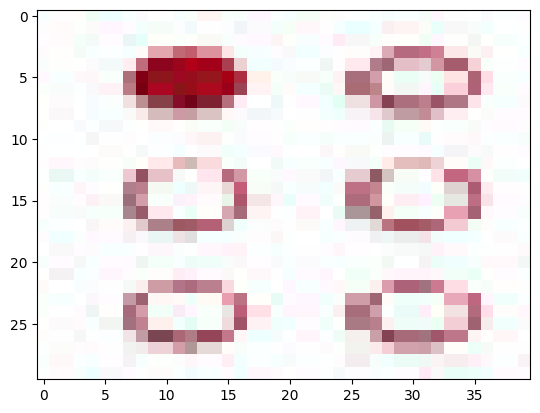

1/1 [==============================] - 0s 23ms/step
Chữ A


In [35]:
filename = "/content/drive/MyDrive/Data/A (10).jpg"
vat = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
       14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
img = load_img(filename,target_size = (30,40))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = model.predict(img).argmax()
print('Chữ',vat[result])

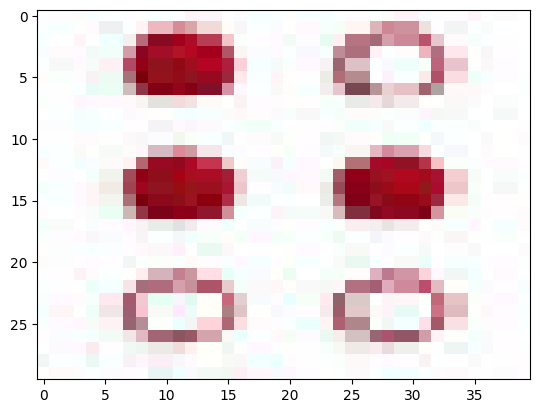

1/1 [==============================] - 0s 25ms/step
Chữ H


In [37]:
filename = "/content/drive/MyDrive/Data/H (10).jpg"
vat = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
       14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
img = load_img(filename,target_size = (30,40))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = model.predict(img).argmax()
print('Chữ',vat[result])

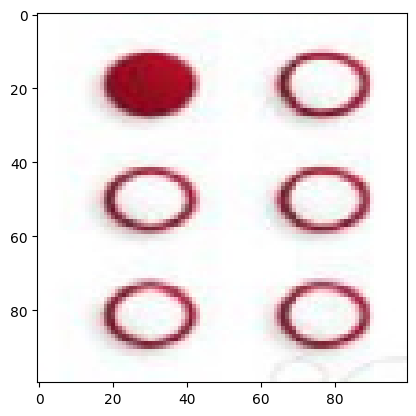

In [34]:
filename = "/content/drive/MyDrive/mẫu/A/A (10).jpg"
img = load_img(filename,target_size = (100,100))
img_show = plt.imshow(img)
plt.show()